In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv')
train_data.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [3]:
test_data = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv')
test_data.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [4]:
train_data.isnull().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [5]:
test_data.isnull().sum()

date_time            0
deg_C                0
relative_humidity    0
absolute_humidity    0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
dtype: int64

In [6]:
features = ['deg_C', 'relative_humidity', 'absolute_humidity','sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
targets = ['target_benzene','target_carbon_monoxide','target_nitrogen_oxides']

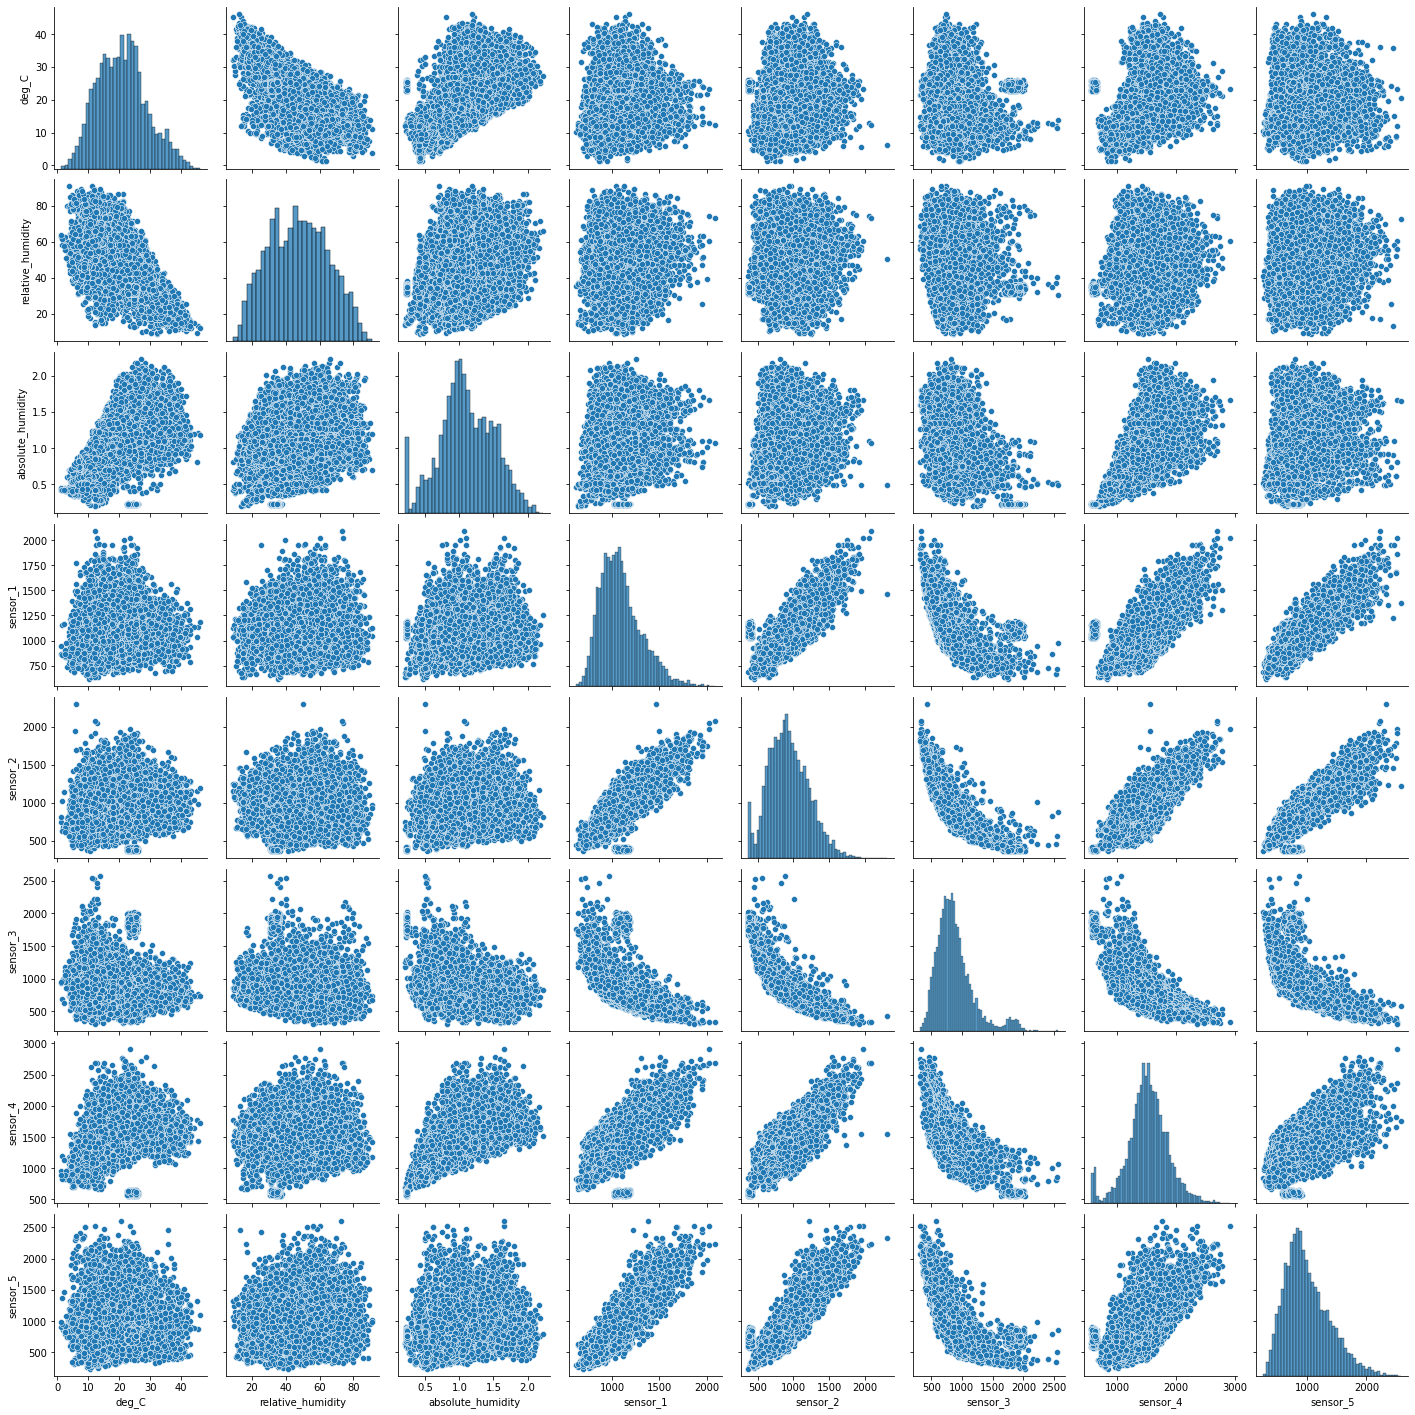

In [7]:
sns.pairplot(train_data[features])

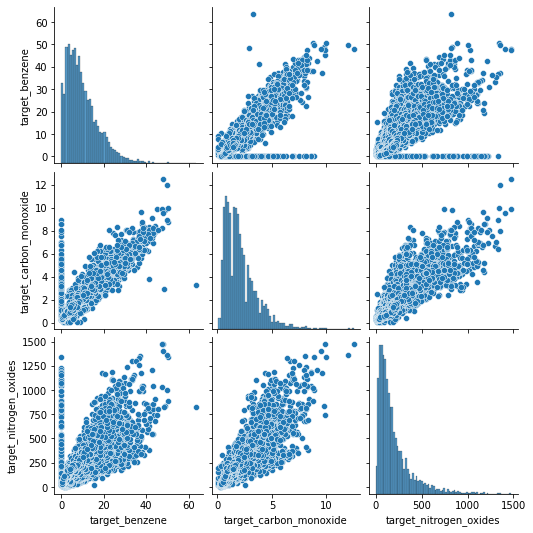

In [8]:
sns.pairplot(train_data[targets])

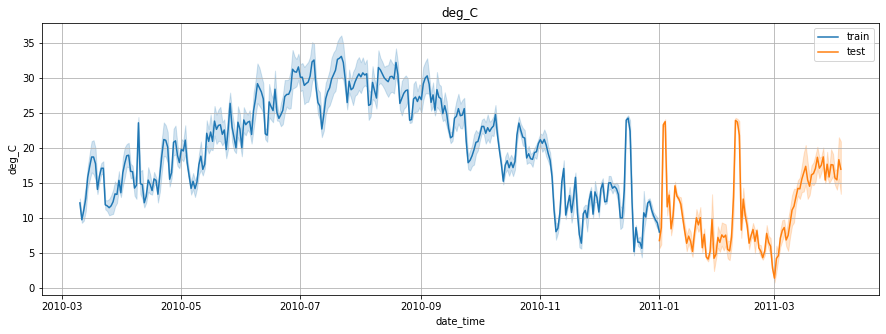

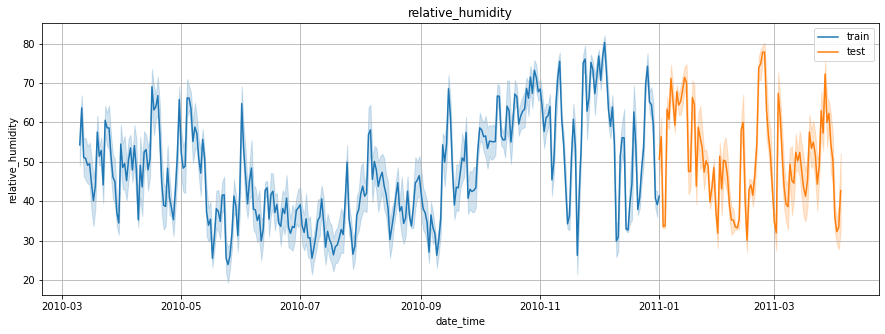

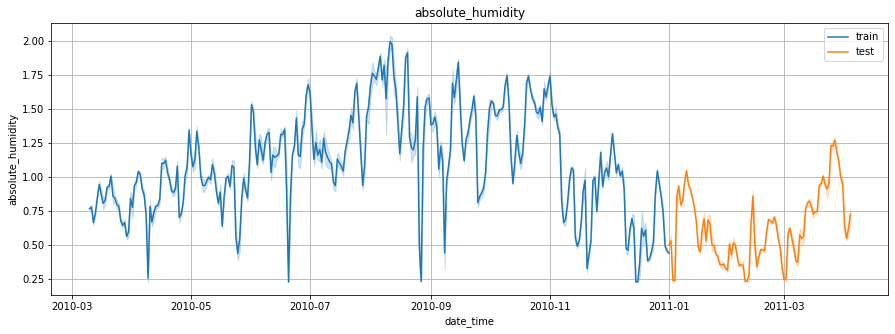

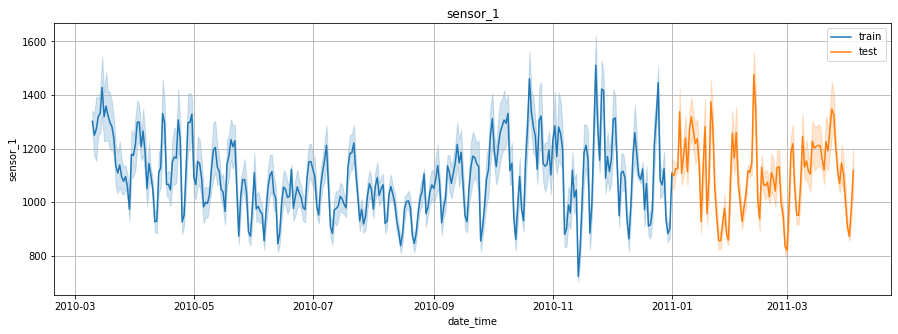

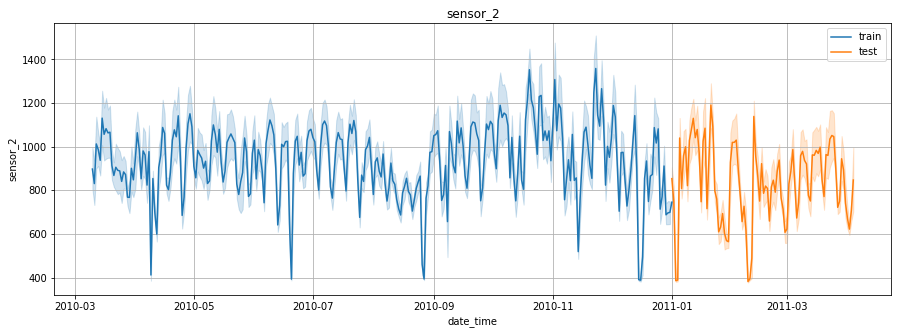

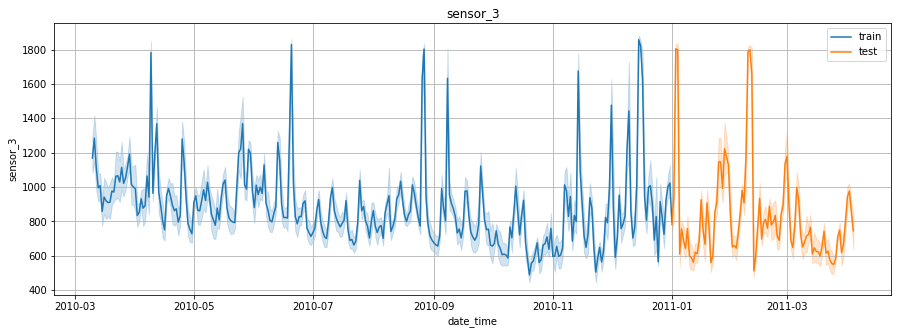

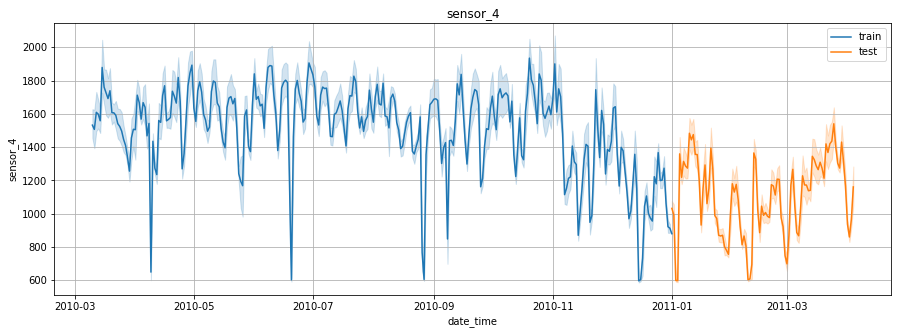

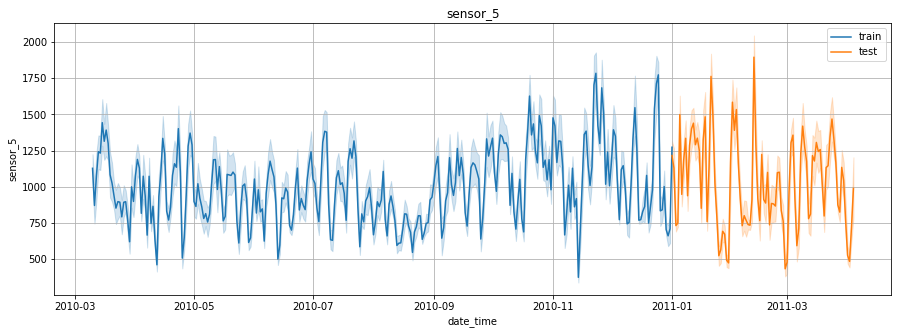

In [9]:
for i in features:
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=train_data,x=pd.to_datetime(train_data.date_time).dt.date, y=train_data[i])
    sns.lineplot(data=test_data,x=pd.to_datetime(test_data.date_time).dt.date, y=test_data[i])
    plt.legend(labels=["train","test"])
    plt.title(i)
    plt.grid()

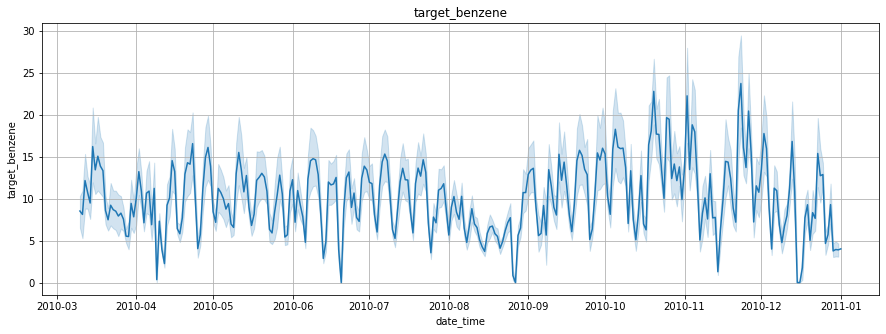

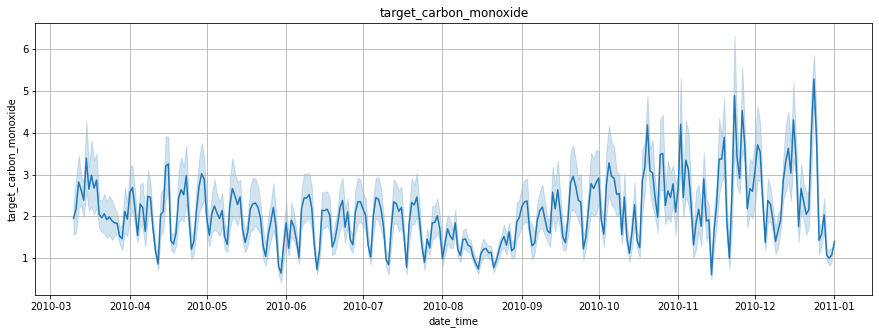

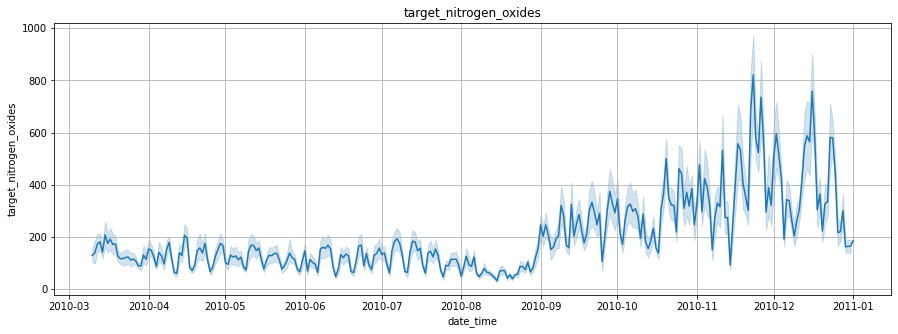

In [10]:
for i in targets:
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=train_data,x=pd.to_datetime(train_data.date_time).dt.date, y=train_data[i])
    plt.title(i)
    plt.grid()

In [11]:
carbon_monoxide = train_data["target_carbon_monoxide"]
benzene = train_data["target_benzene"]
nitrogen_oxides= train_data["target_nitrogen_oxides"]
train_data = train_data.drop(["date_time","target_carbon_monoxide", "target_benzene", "target_nitrogen_oxides"], axis = 1)
test_data = test_data.drop("date_time", axis = 1)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model_carbon_monoxide = LinearRegression()
model_benzene  = LinearRegression()
model_nitrogen_oxides = LinearRegression()

model_carbon_monoxide.fit(train_data, carbon_monoxide)
model_benzene.fit(train_data,benzene)
model_nitrogen_oxides.fit(train_data,nitrogen_oxides)

LinearRegression()

In [14]:
pred_log_carbon_monoxide = model_carbon_monoxide.predict(test_data)
pred_log_benzene = model_benzene.predict(test_data)
pred_log_nitrogen_oxides = model_nitrogen_oxides.predict(test_data)

In [15]:
output = pd.DataFrame({'date_time': pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/test.csv').date_time,
                       'target_carbon_monoxide': pred_log_carbon_monoxide, 
                       'target_benzene': pred_log_benzene, 
                       'target_nitrogen_oxides': pred_log_nitrogen_oxides})
output

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.910060,5.199805,349.499520
1,2011-01-01 01:00:00,2.849271,9.354853,497.618061
2,2011-01-01 02:00:00,2.263946,8.058767,422.895596
3,2011-01-01 03:00:00,2.452970,9.208397,420.106970
4,2011-01-01 04:00:00,2.015817,7.221564,374.092298
...,...,...,...,...
2242,2011-04-04 10:00:00,3.233823,13.233296,399.267208
2243,2011-04-04 11:00:00,2.608145,10.341265,325.099500
2244,2011-04-04 12:00:00,2.683531,11.866763,323.300599
2245,2011-04-04 13:00:00,2.312458,9.900631,329.783251


In [16]:
from catboost import CatBoostRegressor

In [17]:
model_carbon_monoxide = CatBoostRegressor(silent=True)
model_benzene  = CatBoostRegressor(silent=True)
model_nitrogen_oxides = CatBoostRegressor(silent=True)

model_carbon_monoxide.fit(train_data, carbon_monoxide)
model_benzene.fit(train_data,benzene)
model_nitrogen_oxides.fit(train_data,nitrogen_oxides)

In [18]:
pred_log_carbon_monoxide = model_carbon_monoxide.predict(test_data)
pred_log_benzene = model_benzene.predict(test_data)
pred_log_nitrogen_oxides = model_nitrogen_oxides.predict(test_data)

In [19]:
output_2 = pd.DataFrame({'date_time': pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/test.csv').date_time,
                       'target_carbon_monoxide': pred_log_carbon_monoxide, 
                       'target_benzene': pred_log_benzene, 
                       'target_nitrogen_oxides': pred_log_nitrogen_oxides})
output_2

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.325616,4.908699,224.299214
1,2011-01-01 01:00:00,2.109530,7.601782,346.560555
2,2011-01-01 02:00:00,1.790082,7.595993,375.325419
3,2011-01-01 03:00:00,1.887853,8.810433,385.187046
4,2011-01-01 04:00:00,0.995681,6.130259,248.978056
...,...,...,...,...
2242,2011-04-04 10:00:00,3.306646,13.746627,521.295971
2243,2011-04-04 11:00:00,2.489366,12.134906,289.266161
2244,2011-04-04 12:00:00,2.745361,13.494206,385.176732
2245,2011-04-04 13:00:00,2.229013,11.484370,289.214973


In [20]:
output_2.to_csv('submission.csv', index = False)